# In-Class Assignment: Simulating Superbugs using agent-based modeling
# Day 8
# CMSE 202

<img src="https://sites.psu.edu/siowfa16/files/2016/10/Screen-Shot-2016-10-18-at-12.50.26-AM-1egeuzd.png" width=400px>
<p style="text-align: right;">Image from: https://sites.psu.edu/siowfa16/2016/10/18/what-are-superbugs/comment-page-1/</p>

### <p style="text-align: right;"> &#9989; **Put your name here** </p>
#### <p style="text-align: right;"> &#9989; Put your group member names here</p>

## Learning Goals:

By the end of this assignment you should have:
* Become more comfortable with writing a custom class from scratch
* Practiced using stub functions to sketch out the methods needed by a new class
* Designed a plan for implementing an agent-based model to simulate bacteria evolution
    * **Note**: Design decisions early on can have a large impact on the final outcome.  Try to make design decisions that are flexible. Do not be afraid to refactor your code (i.e. start over with the design). 

## Agenda

1. [Pre-class assignment review and discussion](#pca-review)
1. [Problem Description (simulating bacteria evolution)](#problem)
1. [Building code stubs for your model (using classes and methods)](#code-stubs)
1. [Preview Visualization](#visualization)

## Assignment instructions

Instructions for submitting this assignment are at the end of the notebook. The assignment is due at the end of class.


---
<a id="pca-review"></a>
# 1. Pre-class assignment review and discussion

Did anyone have any specific issues with the pre-class assignment?

Let's take a moment to highlight some key concepts. **Discuss with your group** the following prompts and write down a some brief notes from your discussion.

&#9989; **Question 1:** What data structures did you think you might need to simulate the petri-dish experiment? What would these data structures be used to represent or keep track of?

You would need loops and a stub function

&#9989; **Question 2:** What classes did you think you would need to define and what were some of the methods you came up with?

Some classes you would need would be replicate, mutate, and execute 

----
<a id="problem"></a>
# 2. Problem Description (simulating bacteria evolution)

In this assignment we are going to start to build an agent based model to simulate the evolution of bacteria to become resistant to antibiotics.   If you need to refresh your memory, re-watch the following video that was in your pre-class assignment.  Our goal is to build a simulation that reconstructs this real world experiment. 

Here's the link to the original article as well: http://www.the-scientist.com/?articles.view/articleNo/46993/title/Giant-Petri-Dish-Displays-Evolution-in-Space-and-Time/

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("yybsSqcB7mE",width=640,height=360)

To make this ABM work we would like you to build a system with the following assumptions.

1. Assume a random rectangular petri dish of ```N``` locations wide and ```M``` locations tall (e.g. 90 x 45).
1. Assume that each location on the board is given three (3) different types of antibiotics which each can have continuous values from min to max (e.g. 0 to 1).
1. Assume that bacteria on the board do not move. 
1. Assume each bacteria has a genome sequence of three genes of continuous number (e.g. 0 to 1) that provide immunity to the antibiotics. Each gene will correspond to one of the antibiotic elements deposited on the petri dish
1. Assume that at each iteration of the simulation each bacteria can randomly copy itself once to a random neighboring empty cell (up, down, left, or right). 
1. Assume that during the copy there is a chance of mutating each gene (randomly selecting a new value between zero and one) by some mutation rate (e.g. 20%). 
1. Assume that a bacteria will "die" if the value of it's gene does not contain resistance to any one of the three antibacteria. For example, if the gene is a number less than the value of it's corresponding antibiotic it will die.

**NOTE:** Assumptions are very important.  Make sure you document any major changes, clarifications or deviations from the above.  Instead of asking your instructor for clarification, try looking at the end goal (simulate the petri dish experiment) and make your own clarification. There are many right answers.  

&#9989; **Question 3:** What additional assumptions do you think you need to make for this project?  Do you need to modify or add to any of the above assumptions to make the problem more tractable?

You would need a possible self kill switch if the mutation was inefficient and became "cancerous" such as in a real life cell a possible contingency  plan if you were to create rouge program mistakes.

**Consider the following example simulation as one possible solution to this problem:**

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("p_wGHmNYE_0",width=800,height=450)

This video was created with the following settings:

* The bugs were initialized in the first and last column of the petri dish with randomly generated bacteria 
* Equal amounts of all three antibiotics in 9 different bins using the following pattern:  
    | 0.0 | 0.50 | 0.75 | 0.80 | 0.95 | 0.80 | 0.75 | 0.5 | 0.0 |
* The cells copied with a mutation rate of 20% (i.e. there is a 20% chance each gene will randomly mutate during each copy).


----
<a id="code-stubs"></a>
# 3. Building code stubs for your model (using classes and methods)

**&#9989; Do This:** **As a group**, decide on what classes and functions that will be needed for the simulation and create stub functions for your classes.  Focus on the inputs, outputs and data types, but don't worry about trying to code up all of your methods yet! You just need the stub functions. 

Here are some hints:
- you can use the `pass` keyword to create an empty class or an empty method. However, in creating an empty method you can still specify the input parameters which can be useful
- you might think about some class variables, values that can be stored and utilized by all instances

In [ ]:
# Put your stub functions here
class Bacteria:
    
    def __init__(self):
        pass
    
    def reproduce(self):
        pass
    
    def mutate(self):
        pass
    
    def die(self):
        pass

----
<a id="visualization"></a>
# 4.  Initialize and draw your "world" for the model (i.e. the petri dish and initial bacteria)

Lets start filling in the stub functions by focusing on the **visualization**. Try considering the following:

* Use colors to indicate the level of antibiotics in the petri dish. Since there are three antibiotics you can use the Red, Green and Blue Channels to indicate the amount of each of the three antibiotics. The `imshow` function can process a 2D array of RGB values.
* Use colors to differentiate the types of the bugs. Since there are three genes for each bug, you can use the Red, Green and Blue color channels to differentiate them. The `scatter` function can take in a list of RGB values to color a point.

You should come up with a method (or couple of methods) in your class (or classes) to draw the petri dish and the bugs. Should bug be able to draw themselves on the petri dish given their location? Or should the petri dish handling all of the drawing given a list of bugs? You get to choose how to do this!

**&#9989; Do This:** Try to implement some of your stub functions to initialize the problem and see if you can come up with a method to visualize the starting state. See if you can create a board that looks similar to the following:
<div align="center"><img src="https://i.ibb.co/gwwg9rC/example-dish.png" alt="example-dish" border="0", width=800></div>


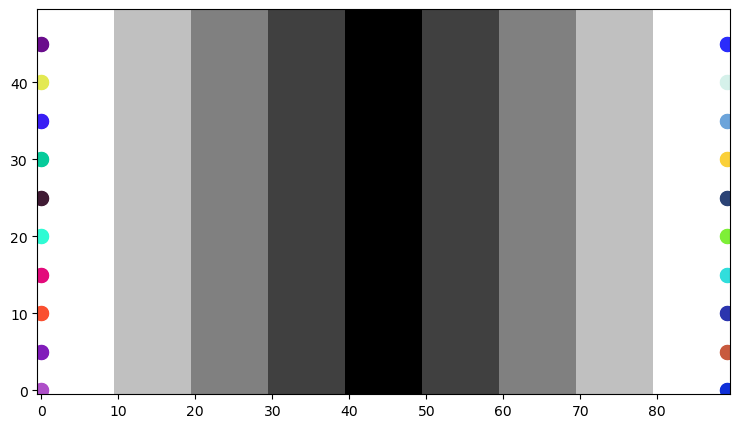

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Bacteria:
    def __init__(self, genes, position):
        self.genes = np.array(genes)  # RGB values for the bacteria's genes
        self.position = np.array(position, dtype=np.float64)  # Bacteria's position (x, y)
        self.alive = True  # The bacteria is alive

    def replicate(self, direction):
        # Replicate by creating a new bacterium right next to the parent in a specified direction (left or right)
        new_position = self.position + direction
        return Bacteria(self.genes, new_position)

    def draw(self, ax):
        if self.alive:
            ax.scatter(self.position[0], self.position[1], color=self.genes, s=100)  # Draw the bacterium


class PetriDish:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.center = np.array([width // 2, height // 2])  # Center of the petri dish
        self.antibiotic_levels = np.zeros((height, width))  # 2D array for antibiotic levels (grayscale)
        self.bacteria_list = []

    def add_bacteria(self, bacteria):
        self.bacteria_list.append(bacteria)

    def generate_symmetrical_antibiotic_gradient(self):
      
        num_bands = 9  # Total of 9 vertical bands
        band_width = self.width // num_bands
        for i in range(self.width):
            band_idx = i // band_width
            # Create a mirrored gradient (low resistance on sides (white), high in the middle (black))
            if i < self.width // 2:
                gray_value = 1 - (band_idx / (num_bands // 2))  # Reversed grayscale
            else:
                gray_value = 1 - ((num_bands - 1 - band_idx) / (num_bands // 2))  # Mirror bands
            self.antibiotic_levels[:, i] = gray_value  # Apply grayscale value to the column

    def antibiotic_level_at(self, position):
        x, y = int(position[0]), int(position[1])
        return self.antibiotic_levels[y, x]  # Return the antibiotic level (grayscale value)

    def replicate_bacteria(self):

        new_bacteria = []
        for bacteria in self.bacteria_list:
            current_antibiotic_level = self.antibiotic_level_at(bacteria.position)
            random_value = np.random.rand()  # Random value between 0 and 1

            if bacteria.position[0] > self.width // 2:  # If the bacteria is on the right
                direction = [-1, 0]  # Move left
            else:  # If the bacteria is on the left
                direction = [1, 0]  # Move right

            # Check if the bacteria can replicate towards the center
            if random_value > current_antibiotic_level:
                new_bacteria.append(bacteria.replicate(direction))  # Successful replication towards the center
            else:
                # Bacteria stays in the same spot if it fails the replication test
                new_bacteria.append(bacteria.replicate([0, 0]))

        # Add new bacteria to the dish
        self.bacteria_list.extend(new_bacteria)

    def draw(self):
        fig, ax = plt.subplots(figsize=(10, 5))  # Adjusted to match the aspect ratio of your image
        
        # Draw the antibiotic levels (grayscale bands)
        ax.imshow(self.antibiotic_levels, cmap='gray', interpolation='nearest', origin='lower')

        # Draw the bacteria
        for bacteria in self.bacteria_list:
            bacteria.draw(ax)

        plt.show()


# Example usage
petri_dish = PetriDish(90, 50)  # Create a petri dish of size 90x50

# Generate the reversed antibiotic gradient with white sides and a dark middle
petri_dish.generate_symmetrical_antibiotic_gradient()

# Add initial bacteria on the left and right sides only
for i in range(0, petri_dish.height, 5):  # Spacing out the bacteria evenly
    # Left side bacteria
    petri_dish.add_bacteria(Bacteria([np.random.rand(), np.random.rand(), np.random.rand()], (0, i)))
    # Right side bacteria
    petri_dish.add_bacteria(Bacteria([np.random.rand(), np.random.rand(), np.random.rand()], (petri_dish.width - 1, i)))

# Simulate bacteria replication towards the center over multiple steps
for _ in range(1):  # Run for 20 time steps
    petri_dish.replicate_bacteria()
    petri_dish.draw()

-----
### Congratulations, we're done!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's submission folder (Don't forget to add your names in the first cell).


&#169; Copyright 2024, Department of Computational Mathematics, Science and Engineering at Michigan State University

<!-- 8/29/2024 -->